In [1]:
# Install tmdbsimple (only need to run once)
!pip install tmdbsimple

In [2]:
import json
with open('/Users/dpatt/.secret/imdb_api.json') as f:
    login = json.load(f)
## Display the keys of the loaded dict
login.keys()



dict_keys(['client-id', 'api-key'])

In [3]:
import tmdbsimple as tmdb
tmdb.API_KEY =  login['api-key']

In [4]:
## make a movie object using the .Movies function from tmdb
movie = tmdb.Movies(603)

In [5]:
## movie objects have a .info dictionary 
info = movie.info()
info

{'adult': False,
 'backdrop_path': '/oMsxZEvz9a708d49b6UdZK1KAo5.jpg',
 'belongs_to_collection': {'id': 2344,
  'name': 'The Matrix Collection',
  'poster_path': '/bV9qTVHTVf0gkW0j7p7M0ILD4pG.jpg',
  'backdrop_path': '/bRm2DEgUiYciDw3myHuYFInD7la.jpg'},
 'budget': 63000000,
 'genres': [{'id': 28, 'name': 'Action'},
  {'id': 878, 'name': 'Science Fiction'}],
 'homepage': 'http://www.warnerbros.com/matrix',
 'id': 603,
 'imdb_id': 'tt0133093',
 'original_language': 'en',
 'original_title': 'The Matrix',
 'overview': 'Set in the 22nd century, The Matrix tells the story of a computer hacker who joins a group of underground insurgents fighting the vast and powerful computers who now rule the earth.',
 'popularity': 92.004,
 'poster_path': '/f89U3ADr1oiB1s9GkdPOEpXUk5H.jpg',
 'production_companies': [{'id': 79,
   'logo_path': '/tpFpsqbleCzEE2p5EgvUq6ozfCA.png',
   'name': 'Village Roadshow Pictures',
   'origin_country': 'US'},
  {'id': 372,
   'logo_path': None,
   'name': 'Groucho II Film

In [6]:
info['budget']
info['revenue']
info['imdb_id']

'tt0133093'

In [7]:
movie = tmdb.Movies('tt1361336')
info = movie.info()
info['budget']

50000000

In [8]:
# example from package README
# source = https://github.com/celiao/tmdbsimple
releases = movie.releases()
for c in releases['countries']:
    if c['iso_3166_1'] == 'US':
        print(c['certification'])


PG
PG
PG


In [9]:
def get_movie_with_rating(movie_id):
# Get the movie object for the current id
    movie = tmdb.Movies('tt1361336')
# save the .info .releases dictionaries
    info = movie.info()
    releases = movie.releases()
# Loop through countries in releases
    for c in releases['countries']:
    # if the country abbreviation==US
        if c['iso_3166_1' ] =='US':
        ## save a "certification" key in the info dict with the certification
           info['certification'] = c['certification']
    return info

In [10]:
test = get_movie_with_rating("tt0848228") #put your function name here
test

{'adult': False,
 'backdrop_path': '/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg',
 'belongs_to_collection': None,
 'budget': 50000000,
 'genres': [{'id': 35, 'name': 'Comedy'},
  {'id': 10751, 'name': 'Family'},
  {'id': 16, 'name': 'Animation'}],
 'homepage': 'https://www.tomandjerrymovie.com',
 'id': 587807,
 'imdb_id': 'tt1361336',
 'original_language': 'en',
 'original_title': 'Tom & Jerry',
 'overview': 'Tom the cat and Jerry the mouse get kicked out of their home and relocate to a fancy New York hotel, where a scrappy employee named Kayla will lose her job if she can’t evict Jerry before a high-class wedding at the hotel. Her solution? Hiring Tom to get rid of the pesky mouse.',
 'popularity': 61.27,
 'poster_path': '/8XZI9QZ7Pm3fVkigWJPbrXCMzjq.jpg',
 'production_companies': [{'id': 25120,
   'logo_path': '/lMj6nMJBOzfLEd2fu8uF530AJcv.png',
   'name': 'Warner Bros. Pictures Animation',
   'origin_country': 'US'},
  {'id': 8922,
   'logo_path': '/yZWehAyjfKi4KvKeg1bkJ1bm5H8.png',
   'name':

In [11]:
## testing our function by looping through a list of ids
import pandas as pd
test_ids = ["tt0848228", "tt0115937","tt0848228","tt0332280"]
results = []
errors = []
for movie_id in test_ids:
    
    try:
        movie_info = get_movie_with_rating(movie_id)
        results.append(movie_info)
        
    except Exception as e: 
        errors.append([movie_id, e])
    
pd.DataFrame(results)



,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,False,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,None,50000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807,tt1361336,en,Tom & Jerry,...,136536687,101,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,False,6.9,2243,PG
1,False,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,None,50000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807,tt1361336,en,Tom & Jerry,...,136536687,101,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,False,6.9,2243,PG
2,False,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,None,50000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807,tt1361336,en,Tom & Jerry,...,136536687,101,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,False,6.9,2243,PG
3,False,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,None,50000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807,tt1361336,en,Tom & Jerry,...,136536687,101,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,False,6.9,2243,PG


In [12]:
print(f"- Number of errors: {len(errors)}")
errors

- Number of errors: 0


[]

In [20]:
from tqdm.notebook import tqdm_notebook

In [21]:
import os, time,json
import tmdbsimple as tmdb 
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['.title_basics 2 2.csv.icloud',
 '.DS_Store',
 '.title_akas.csv.gz.icloud',
 '.title_basics 2.csv.icloud',
 '.title_basics.csv.gz.icloud',
 '.title_basics 2.csv.gz.icloud',
 'filtered_basic_years.csv.gz',
 '.title_akas 2.csv.gz.icloud',
 'filtered_re_akas_cleaned.csv.gz',
 'filt_akas_cleaned.csv.gz',
 '.title_ratings 2.csv.gz.icloud',
 '.title_ratings.csv.gz.icloud',
 'filt_ratings.csv.gz']

In [22]:
def write_json(new_data, filename): 
    """Appends a list of records (new_data) to a json file (filename). 
    Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""  
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)

In [23]:
# Load in the dataframe from project part 1 as basics:
basics = pd.read_csv('Data/filtered_basic_years.csv.gz')

In [24]:
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"
4,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,NaN,126,Drama


In [25]:
years_to_get = [2000,2001]

In [26]:
def write_json(new_data, filename): 
    """Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""    
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)

In [27]:
for YEAR in tqdm_notebook(years_to_get, desc='YEARS', position=0):
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    file_exists = os.path.isfile(JSON_FILE)

    if file_exists == False:
        with open(JSON_FILE,'w') as f:
            json.dump([{'imdb_id':0}],f)

    df = basics.loc[basics['startYear']==YEAR].copy()

    movie_ids = df['tconst'].copy()
    movie_ids

    previous_df = pd.read_json(JSON_FILE)

    previous_df

    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]

    for movie_id in tqdm_notebook(movie_ids_to_get,
                                  desc=f'Movies from {YEAR}',
                                  position=1,
                                  leave=True):
        try:
            # Retrieve then data for the movie id
            temp = get_movie_with_rating(movie_id)  
            # Append/extend results to existing file using a pre-made function
            write_json(temp,JSON_FILE)
            # Short 20 ms sleep to prevent overwhelming server
            time.sleep(0.02)
            
        except Exception as e:
            continue

    final_year_df = pd.read_json(JSON_FILE)
    final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)

YEARS:   0%|          | 0/2 [00:00<?, ?it/s]

Movies from 2000:   0%|          | 0/1456 [00:00<?, ?it/s]

Movies from 2001:   0%|          | 0/1577 [00:00<?, ?it/s]

In [30]:
df_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
df_2000.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,PG
2,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,PG
3,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,PG
4,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,PG


In [31]:
df_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')
df_2001

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,PG
2,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,PG
3,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,PG
4,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,PG
1574,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,PG
1575,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,PG
1576,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,PG


In [32]:
df_merged = pd.concat([df_2000,df_2001],ignore_index = True, sort = False)
df_merged

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,PG
2,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,PG
3,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,PG
4,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,PG
3031,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,PG
3032,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,PG
3033,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,PG


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df_merged.head()

,imdb_id,adult,backdrop_path,budget,genres,homepage,id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,Tom the cat and Jerry the mouse get kicked out...,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,PG
2,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,Tom the cat and Jerry the mouse get kicked out...,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,PG
3,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,Tom the cat and Jerry the mouse get kicked out...,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,PG
4,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,Tom the cat and Jerry the mouse get kicked out...,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,PG


<AxesSubplot: xlabel='revenue', ylabel='budget'>

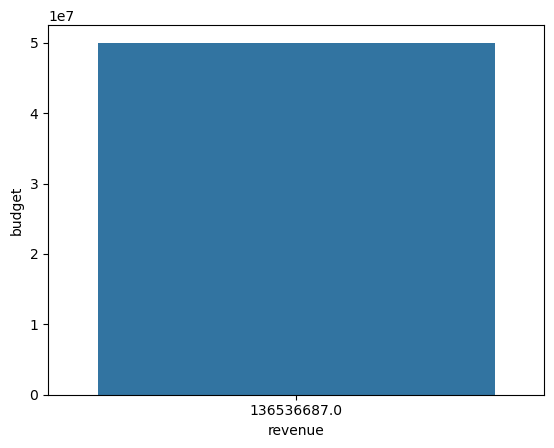

In [40]:
sns.barplot(df_merged, x='revenue', y = 'budget')